# Linear Regression

[Linear Regression][1] (LR) is a quite common task for scientific and can be performed in many fashions most of all methods relying on [Linear Algebra][2].

[1]: https://en.wikipedia.org/wiki/Linear_regression
[2]: https://en.wikipedia.org/wiki/Linear_algebra

## Introduction

This notebook is extensively inspired by the excellent [article][1]: "*8 ways to perform simple linear regression and measure their speed using Python*" by **Tirthajyoti Sarkar** and investigates side aspects of each method ([source code][2]).

[1]: https://medium.freecodecamp.org/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b
[2]: https://github.com/tirthajyoti/Python-Machine-Learning-Demo-Tutorials/blob/master/Linear_Regression_Methods.ipynb

### Trivial imports

Most methods presented here works with the bare use of [`numpy`][3], [`matplotlib`][4] is just a convenience for data display.

[3]: http://www.numpy.org/
[4]: https://matplotlib.org/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [100]:
from collections.abc import Iterable
from numbers import Number

class Chi2:

    def __init__(self, x, mu=None, sx=None, model=None, predictor=None):
        
        assert isinstance(x, Iterable)
        self._x = np.array(x)
        
        assert (mu is None) or isinstance(mu, Iterable)
        assert (model is None) or callable(model)
        assert not((mu is None) and (model is None))
        if mu is None:
            mu = model(predictor)
        else:
            mu = mu
        self._mu = np.array(mu)
        assert len(x) == len(mu)
        
        
        assert (predictor is None) or (isinstance(mu, Iterable) and (len(predictor) == len(x)))
        assert not((model is None) and (predictor is None) and (mu is None))
        self._predictor = predictor
        #assert len(predictor)
        
        if sx is None:
            self._sx = np.ones(x.shape)
        elif isinstance(sx, Number):
            self._sx = np.full(x.shape, sx)
        elif isinstance(sx, Iterable):
             pass
        else:
            raise TypeError
        self._sx = np.array(sx)
        assert len(sx) == len(x)
    
    @property
    def n(self):
        return len(self.x)
    
    @property
    def z(self):
        return self._predictor
    
    @property
    def x(self):
        return self._x
    
    @property
    def mu(self):
        return self._mu
    
    @property
    def sx(self):
        return self._sx
    
    def chi_terms(self):
        return (self.x - self.mu)/self.sx

    def chi2_terms(self):
        return self.chi_terms()**2
    
    def chi2(self):
        return np.sum(self.chi2_terms())

    def chi2n(self):
        return self.chi2()/(self.n - 1)

    def chi2ns(self):
        sx2 = np.sqrt(2./(self.n - 1))
        return (self.chi2n()-1)/sx2
    
    def plot(self, mode='norm', title=''):
        assert isinstance(mode, str)
        assert mode in {'norm', 'model'}
        fig, axe = plt.subplots()
        if (mode=='norm') or (self.z is None):
            axe.errorbar(self.mu, self.chi_terms(), yerr=self.sx, marker='x', linestyle='none', linewidth=0.75, label='Trial Data')
            axe.axhline(0, linestyle=':', color='k')
            axe.set_xlabel("Reference, $\mu$")
            axe.set_ylabel("Chi, $\chi = \frac{x-\mu}{s_x}$")
        elif (mode=='model'):
            axe.errorbar(self.z, self.x, yerr=self.sx, marker='x', linestyle='none', linewidth=0.75, label='Trial Data')
            axe.set_xlabel("Variable, $z$")
            axe.set_ylabel("Variable, $x = f(z)$")
        axe.set_title("Chi Square: %s" % title)

        axe.grid()
        axe.legend()
        
        return fig, axe

### Trial Data

We generate a trial pseudo-random dataset for the example purpose of a linear relationship between two variables ($X$ and $Y$) with the following model:

$$
\begin{equation}
Y_i = \beta_1 X_i + \beta_0 + \epsilon_i \,,\quad \epsilon_i \sim \mathcal{N}(\mu = 0, \sigma_i)
\end{equation}
$$

Errors on measurement are centered normal with different variances ([Heteroscedasticity][1]).

[1]: https://en.wikipedia.org/wiki/Heteroscedasticity

#### Generation

In [92]:
np.random.seed(12345678)

In [93]:
n = 31
x = np.linspace(0, 10, n)
sx = np.abs(0.65*np.random.randn(n)) + 0.2
f = np.poly1d([2, 3])
e = np.array([si*np.random.randn(1)[0] for si in sx])
y = f(x) + e

#### Goodness of Fit

 - https://en.wikipedia.org/wiki/Goodness_of_fit
 - http://physics.ucsc.edu/~drip/133/ch4.pdf
 - https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2.html
 - http://www.astroml.org/book_figures/chapter4/fig_chi2_eval.html

In [94]:
from scipy import stats

In [101]:
X2 = Chi2(y, mu=f(x), sx=sx)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1aff8340b38>)

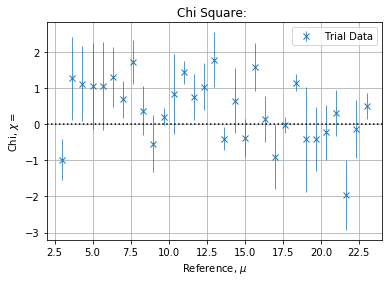

In [102]:
X2.plot()

In [10]:
X2 = Chi2(y, model=f, predictor=x, sx=sx)

In [ ]:
X2.chi2()

In [ ]:
X2.chi2n()

In [ ]:
X2.chi2ns()

In [ ]:
X2.plot()

## Fitting Methods

### `numpy.polyfit`

- https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html

In [ ]:
res121_1 = np.polyfit(x, y, 1)
res121_1

In [ ]:
res121_2 = np.polyfit(x, y, 1, w=1/s)
res121_2

In [ ]:
f121_1 = np.poly1d(res121_1)
f121_2 = np.poly1d(res121_2)

In [ ]:
fig, axe = plotData(x, y, s, title='numpy.polyfit')
axe.plot(x, f121_1(x), label='Fit')
axe.plot(x, f121_2(x), label='Fit W')
axe.legend()

### `scipy.stats.linregress`

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [ ]:
from scipy import stats

In [ ]:
res122 = stats.linregress(x, y)
res122

In [ ]:
f122 = np.poly1d([res122.slope, res122.intercept])

In [ ]:
fig, axe = plotData(x, y, s, title='scipy.stats.linregress')
axe.plot(x, f122(x), label='Fit')
axe.legend()

### `scipy.optimize.curve_fit`

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [ ]:
from scipy import optimize

In [ ]:
def f123p(x, b1, b0):
    return b1*x + b0 

In [ ]:
res123_1 = optimize.curve_fit(f123p, x, y)
res123_1

In [ ]:
res123_2 = optimize.curve_fit(f123p, x, y, sigma=s)
res123_2

In [ ]:
f123_1 = np.poly1d(res123_1[0])
f123_2 = np.poly1d(res123_2[0])

In [ ]:
fig, axe = plotData(x, y, s, title='scipy.optimize.curve_fit')
axe.plot(x, f123_1(x), label='Fit')
axe.plot(x, f123_2(x), label='Fit W')
axe.legend()

### `numpy.linalg.lstsq`

 - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html

In [ ]:
A124 = np.vstack([x, np.ones(len(x))]).T

In [ ]:
res124 = np.linalg.lstsq(A124, y, rcond=-1)
res124

In [ ]:
f124 = np.poly1d(res124[0])

In [ ]:
fig, axe = plotData(x, y, s, title='numpy.linalg.lstsq')
axe.plot(x, f124(x), label='Fit')
axe.legend()

### `statsmodels.api.OLS`

- https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
- https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.predict.html#statsmodels.regression.linear_model.OLS.predict

In [ ]:
import statsmodels.api as sm

In [ ]:
x125 = sm.add_constant(x)

In [ ]:
model125 = sm.OLS(y, x125)

In [ ]:
res125 = model125.fit()
res125

In [ ]:
res125.params

In [ ]:
f125_1 = np.poly1d(np.flipud(res125.params))
f125_2 = res125.predict

In [ ]:
fig, axe = plotData(x, y, s, title='statsmodels.api.OLS')
axe.plot(x, f125_1(x), label='Fit')
axe.plot(x, f125_2(x125), label='Fit Predict')
axe.legend()

In [ ]:
res125.rsquared

In [ ]:
res125.summary()

### `sklearn.linear_model.LinearRegression`

 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x126 = x.reshape(-1,1)

In [ ]:
res126 = LinearRegression().fit(x126, y)
res126

In [ ]:
f126_1 = np.poly1d(np.append(res126.coef_, res126.intercept_))
f126_2 = res126.predict

In [ ]:
res126.score(x126, y)

In [ ]:
fig, axe = plotData(x, y, s, title='statsmodels.api.OLS')
axe.plot(x, f126_1(x), label='Fit')
axe.plot(x, f126_2(x126), label='Fit P')
axe.legend()

### `sklearn.decomposition.PCA`

 - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x127 = np.stack([x,y], axis=1)
x127m = np.mean(x127, axis=0)
x127m

In [ ]:
res127 = PCA(svd_solver='full').fit(x127)
res127

In [ ]:
v = res127.components_
v

In [ ]:
res127.singular_values_

In [ ]:
res127.mean_

In [ ]:
res127.get_covariance()

In [ ]:
def f1(x):
    return -v[1,0]/v[0,0]*(x-x127m[0]) + x127m[1]
def f2(x):
    return -v[1,1]/v[0,1]*(x-x127m[0]) + x127m[1]

In [ ]:
fig, axe = plotData(x, y, s, title='sklearn.decomposition.PCA')
axe.plot(x, f1(x), label='Fit 1st')
axe.plot(x, f2(x), label='Fit 2nd')
#axe.set_aspect('equal', 'box')
axe.legend()